<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%206%20-%20Network%20Training/Week%206%20-%20Non%20conventional%20optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
print(total_batch)
print(mnist.train.num_examples)

550
55000


# Model with gradients

In [0]:
X = tf.placeholder(tf.float32, [784, None]) # mnist data image of shape 28*28=784
Y = tf.placeholder(tf.float32, [10, None]) # 0-9 digits recognition => 10 classes

learning_rate_ = tf.placeholder(tf.float32, shape=())
#it = tf.placeholder(tf.float32, shape=())

# Set model weights
W = tf.Variable(tf.zeros([10, 784]), dtype=tf.float32)
b = tf.Variable(tf.zeros([10,1]), dtype=tf.float32)

y_ = tf.nn.softmax(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)

new_W = W.assign(W - learning_rate_ * (grad_W))
new_b = b.assign(b - learning_rate_ * (grad_b))

correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))


init = tf.global_variables_initializer()

# Standard Model

In [0]:
X_ = tf.placeholder(tf.float32, [784, None]) # mnist data image of shape 28*28=784
Y = tf.placeholder(tf.float32, [10, None]) # 0-9 digits recognition => 10 classes

learning_rate_ = tf.placeholder(tf.float32, shape=())
#it = tf.placeholder(tf.float32, shape=())

# Set model weights
W = tf.Variable(tf.zeros([10, 784]), dtype=tf.float32)
b = tf.Variable(tf.zeros([10,1]), dtype=tf.float32)

y_ = tf.nn.softmax(tf.matmul(W,X_)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate_).minimize(cost)

correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))

init = tf.global_variables_initializer()

In [0]:
def model_standard(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.01):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    cost_history = []
    accuracy_history = []
    
    total_batch = int(mnist.train.num_examples/minibatch_size)
    
    for epoch in range(training_epochs+1):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(minibatch_size)
            batch_xs_t = batch_xs.T
            batch_ys_t = batch_ys.T

            sess.run(optimizer, feed_dict = {X: batch_xs_t, Y: batch_ys_t, learning_rate_: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes})
        accuracy_ = sess.run(accuracy, feed_dict={ X:features, Y: classes})
        cost_history = np.append(cost_history, cost_)
        accuracy_history = np.append(accuracy_history, accuracy_)

        if (epoch % logging_step == 0):
            print("Reached epoch",epoch,"cost J =", cost_)
                
        if (epoch % logging_step == 0):
            print ("Accuracy:", accuracy_)
                
    return sess, cost_history, accuracy_history

In [0]:
sess, cost_history, accuracy_history = model_standard (55000, 50, X_train_tr, labels_, logging_step = 1, learning_r = 0.01)

In [0]:
def run_model(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.001):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    total_batch = int(mnist.train.num_examples/minibatch_size)
    
    cost_history = []
    accuracy_history = []
    
    
    for epoch in range(training_epochs+1):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(minibatch_size)
            batch_xs_t = batch_xs.T
            batch_ys_t = batch_ys.T
            _, _, cost_ = sess.run([new_W, new_b , 
                                    cost], feed_dict = {X_: batch_xs_t, Y: batch_ys_t, learning_rate_: learning_r})
            
        cost_ = sess.run(cost, feed_dict={ X_:features, Y: classes})
        accuracy_ = sess.run(accuracy, feed_dict={ X_:features, Y: classes})
        cost_history = np.append(cost_history, cost_)
        accuracy_history = np.append(accuracy_history, accuracy_)
        #sess.run(epoch_incr_op, feed_dict = {X_: features, Y: classes, learning_rate_: learning_r})

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
        if (epoch % logging_step == 0):
            print ("Accuracy:", accuracy_)
                
    return sess, cost_history, accuracy_history

In [0]:
sess, cost_history, accuracy_history = run_model (100, 50, X_train_tr, labels_, logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 1.06549
Accuracy: 0.773786
Reached epoch 10 cost J = 0.972171
Accuracy: 0.853371
Reached epoch 20 cost J = 0.961519
Accuracy: 0.869357
Reached epoch 30 cost J = 0.956766
Accuracy: 0.877814
Reached epoch 40 cost J = 0.953982
Accuracy: 0.883143
Reached epoch 50 cost J = 0.952118
Accuracy: 0.886386


# Plots

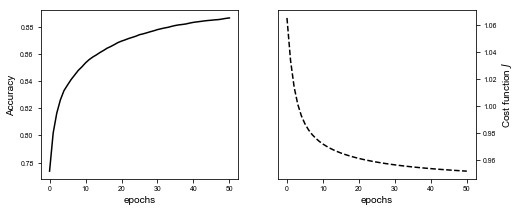

In [0]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.plot(accuracy_history, ls='-', color = 'black', label = 'Accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('Accuracy')


ax = fig.add_subplot(1, 2, 2)
ax.plot(cost_history, ls='--', color = 'black', label = 'Cost Function')
ax.set_xlabel('epochs')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.set_ylabel('Cost function $J$')

fig.savefig('Figure_4-29'+'.png', format='png', dpi=300,bbox_inches='tight')
